# Analysis on Netflix Movies & TV Shows
Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.-analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [2]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Preparation and Cleaning

In [3]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix_titles_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [5]:
netflix_titles_df.isnull().values.any()

True

In [6]:
netflix_titles_df.isnull().sum().sum()

4307

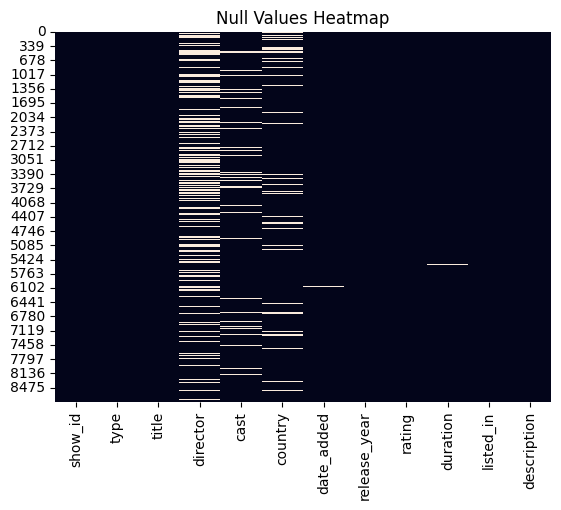

In [7]:
sns.heatmap(netflix_titles_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [8]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added','rating'],inplace=True)

In [10]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

### Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [11]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [12]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### Data Preparation
In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [ ]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

## Exploratory Analysis and Visualization
First we will begin analysis on the entire Netflix dataset consisting of both movies and shows. Revisiting the data, let us see how it looked like again.

In [13]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Netflix Film Types: Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

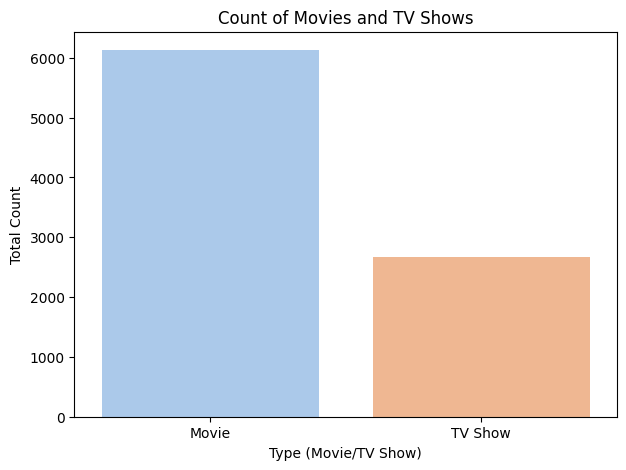

In [14]:
plt.figure(figsize=(7,5))
g = sns.countplot(x=netflix_titles_df.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_titles_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

### Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

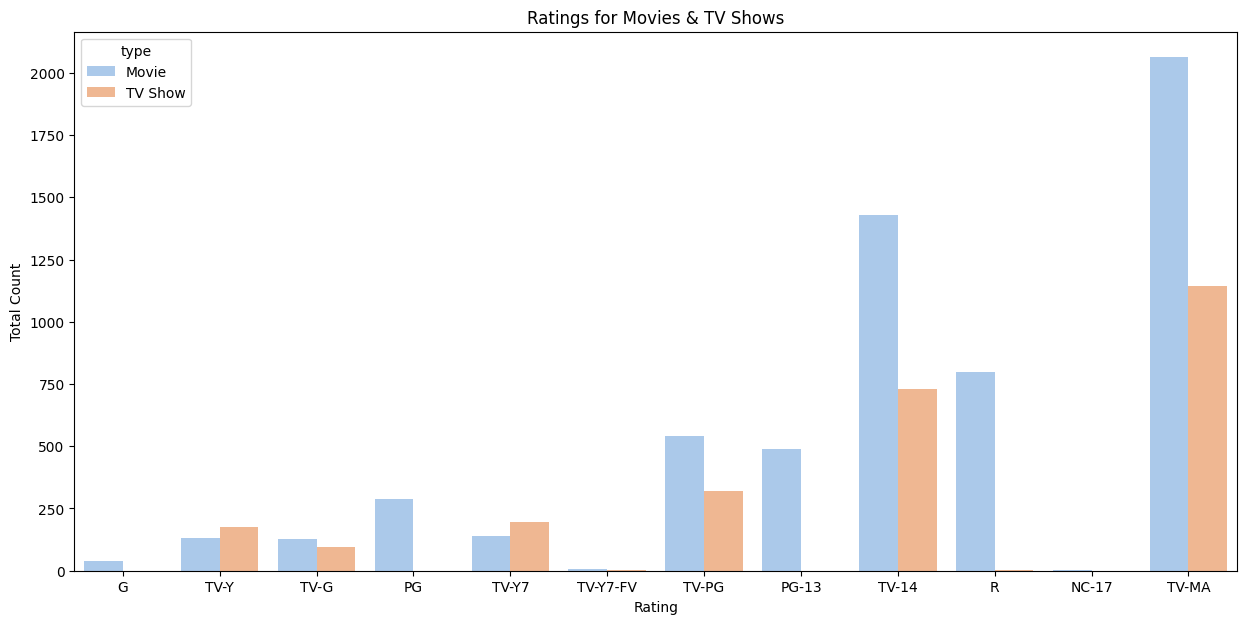

In [15]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(x=netflix_titles_df.rating, hue=netflix_titles_df.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

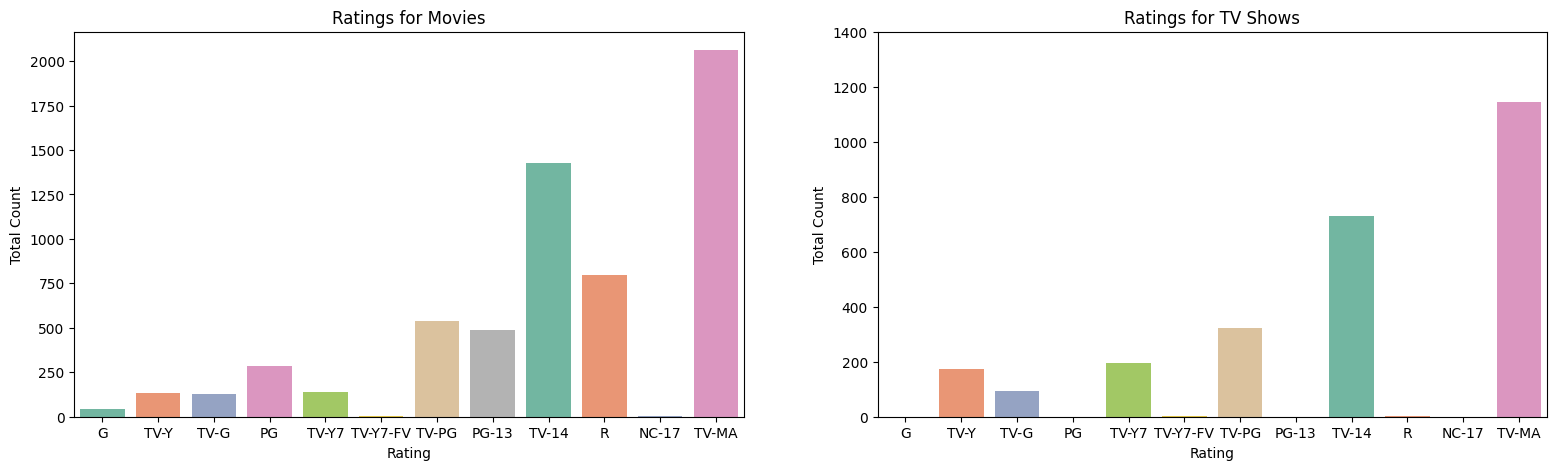

In [16]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(x=netflix_movies_df.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(x=netflix_shows_df.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
plt.show()

In [17]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

In [18]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2016
2,2018,1648
3,2021,1498
4,2017,1186
5,2016,428
6,2015,82
7,2014,24
8,2011,13
9,2013,11
10,2012,3


In [19]:
netflix_year2 = netflix_titles_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

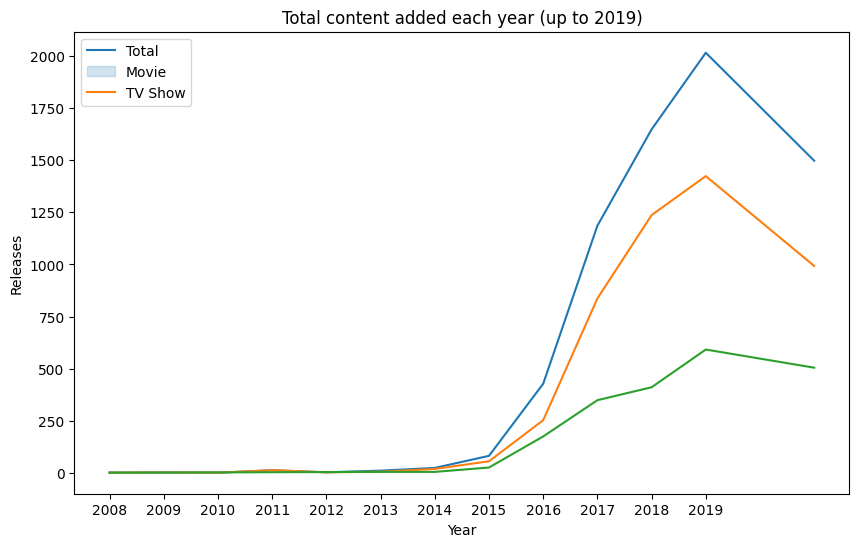

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

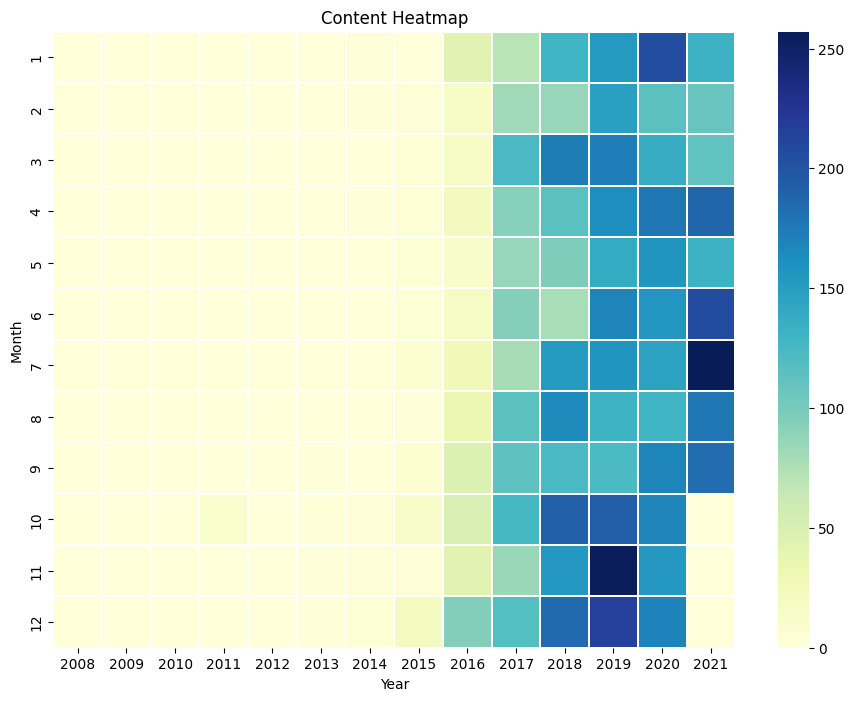

In [21]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

### Countries with the most content available

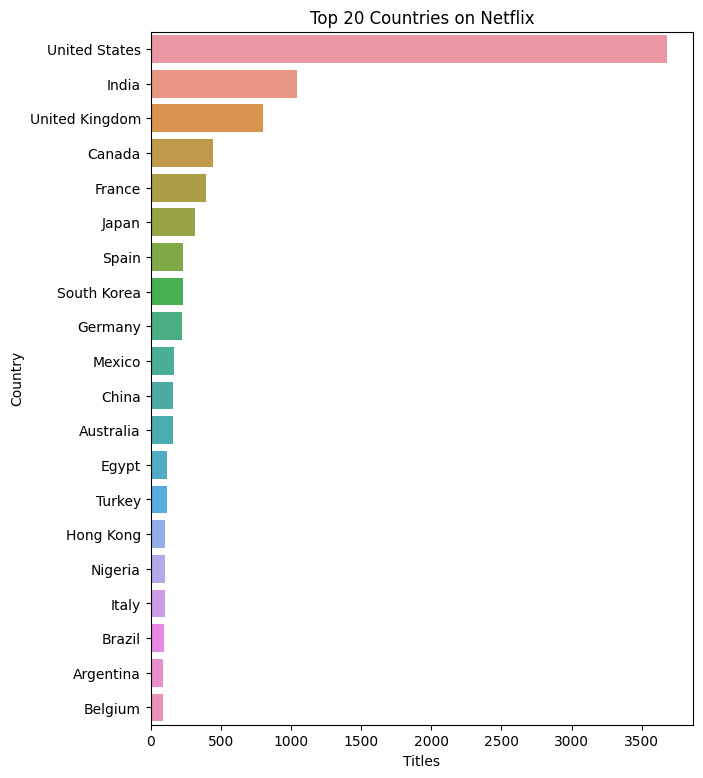

In [22]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

### Recommendation System

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create a new dataframe with relevant columns for the recommendation system
recommendation_df = netflix_titles_df[['title', 'description']].copy()

# Clean the data
recommendation_df.dropna(inplace=True)
recommendation_df.reset_index(drop=True, inplace=True)

# Vectorize the data using TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_data = vectorizer.fit_transform(recommendation_df['description'])

# Compute the cosine similarity matrix
cosine_similarities = cosine_similarity(vectorized_data)

# Define a function to get the top n most similar movies/TV shows
def get_recommendations(title, n=10):
    idx = recommendation_df[recommendation_df['title']==title].index[0]
    similarity_scores = list(enumerate(cosine_similarities[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:n+1]
    recommendations = [recommendation_df.iloc[similarity[0]]['title'] for similarity in similarity_scores]
    return recommendations

# Test the recommendation system
get_recommendations('Stranger Things')


['Rowdy Rathore',
 'Safe Haven',
 'Sakho & Mangane',
 'The Autopsy of Jane Doe',
 'Big Stone Gap',
 'Come and Find Me',
 'FirstBorn',
 'Sinister Circle',
 'Hardy Bucks',
 'Sin senos sí hay paraíso']

### Popular Genres

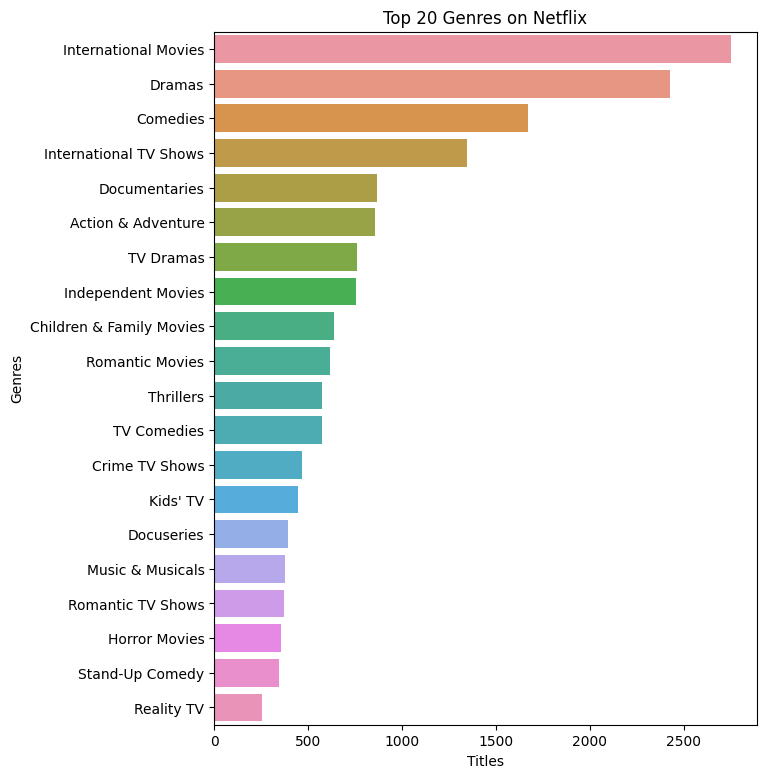

In [24]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [25]:
# Asking and Answering Questions

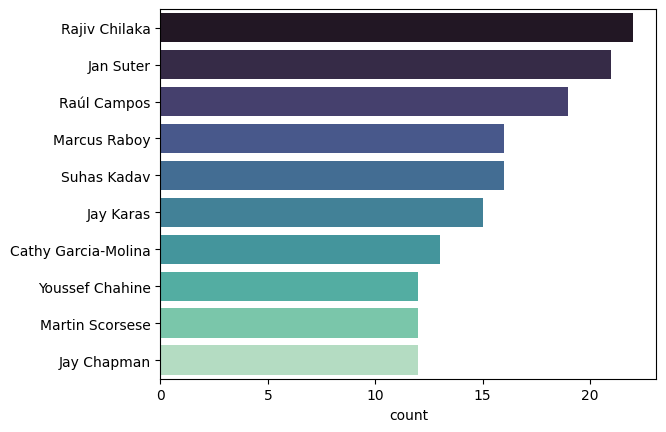

In [26]:
filtered_directors = netflix_titles_df[netflix_titles_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

In [27]:
### Who are the top 10 actors on Netflix based on number of titles?

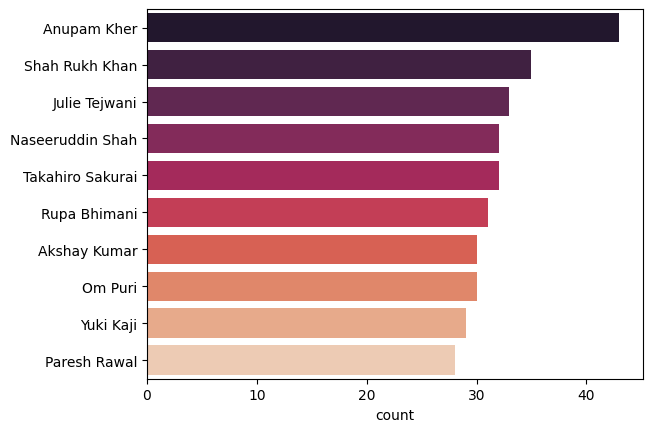

In [28]:
filtered_cast = netflix_titles_df[netflix_titles_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

In [29]:
### How does the timeline look like for the addition of International Movies compared to International TV Shows?

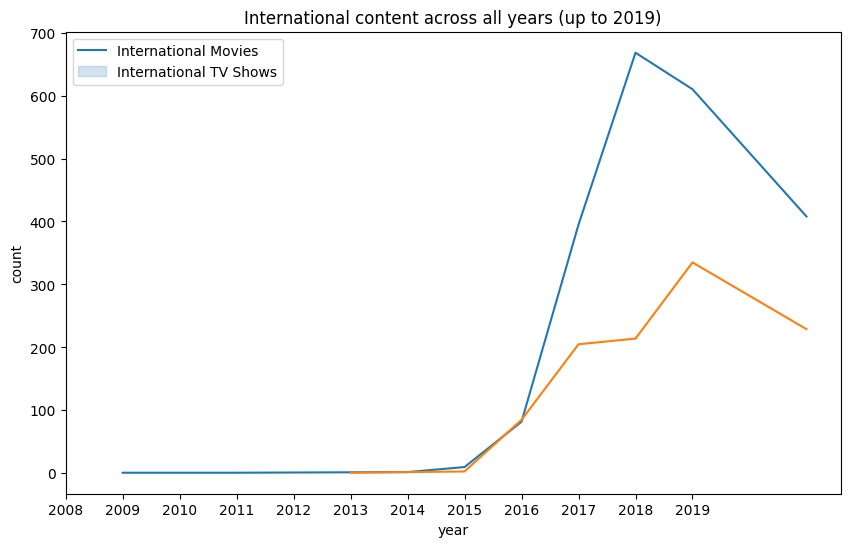

In [30]:
international_movies = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

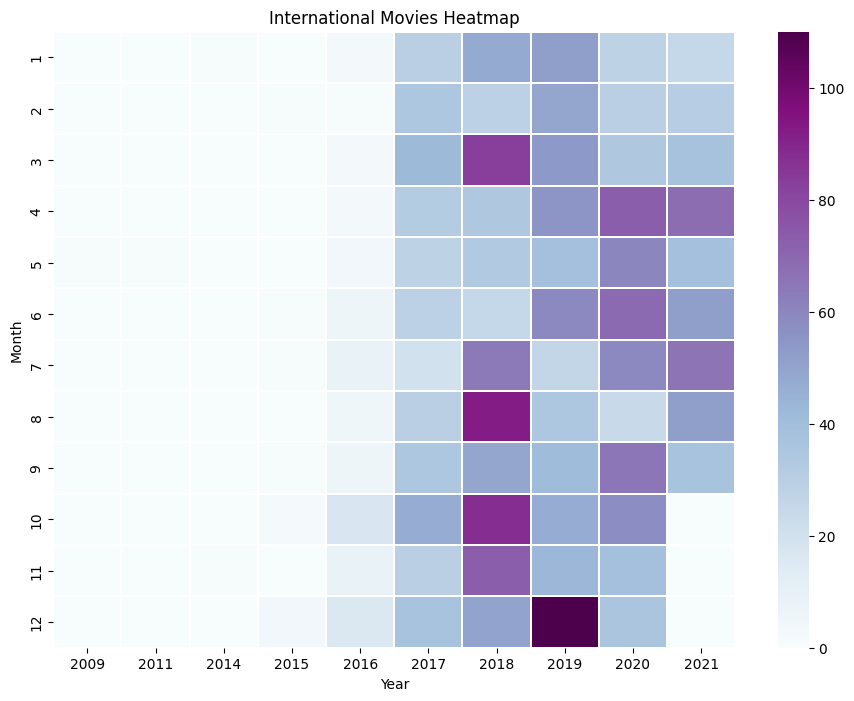

In [31]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

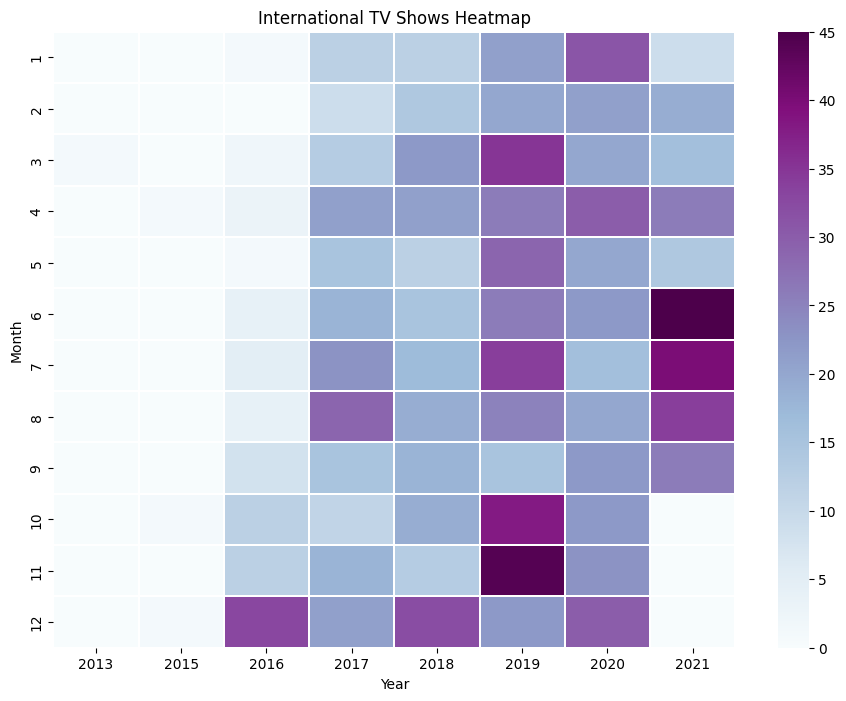

In [32]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In [33]:
### How many movies and TV shows?

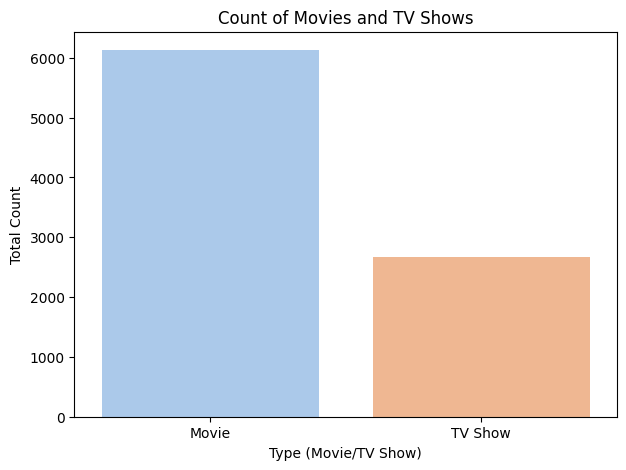

In [34]:
plt.figure(figsize=(7,5))
g = sns.countplot(x=netflix_titles_df.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

In [35]:
###What is the maximum duration on Netflix?

In [ ]:
['season'].value_counts().plot(kind='bar')

In [37]:
### Show TOP 20 Genres.

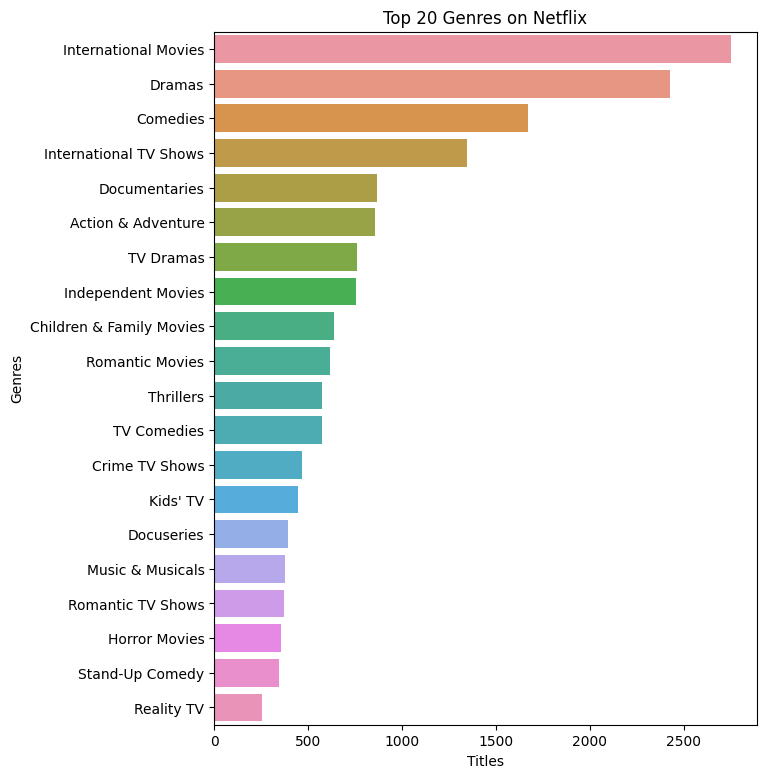

In [38]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.